<a href="https://colab.research.google.com/github/harshit-coder-dev/ML-projects/blob/master/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

we are using SVM model as it is supervised classification learning

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [13]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/loan_status.csv')
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
loan_dataset.shape

(614, 13)

In [15]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [17]:
# here we cant replace missing value with mean, mode because there is categorial value as well so we will drop

loan_dataset = loan_dataset.dropna()

In [18]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [19]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [20]:
loan_dataset['Loan_Status'] = loan_dataset['Loan_Status'].map({'Y':1, 'N':0}).astype('int')  # dicationay dataframe  other function we can use label encoding

In [21]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [22]:
# Dependent column values
loan_dataset['Dependents'].value_counts()  # gives types of values it has

,count
Dependents,
0,274
2,85
1,80
3+,41


In [25]:
# replacing the value of 3+ to 4 because machine knows about numbers not object
loan_dataset['Dependents'] = loan_dataset['Dependents'].replace('3+', 4)

In [26]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


<Axes: xlabel='Education', ylabel='count'>

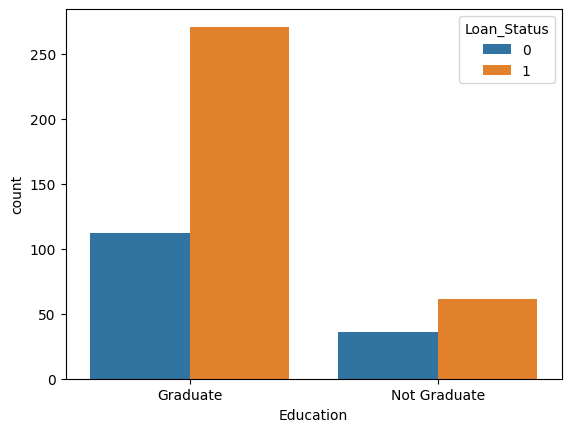

In [27]:
# education & Loan Status
sns.countplot(x= 'Education', hue='Loan_Status', data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

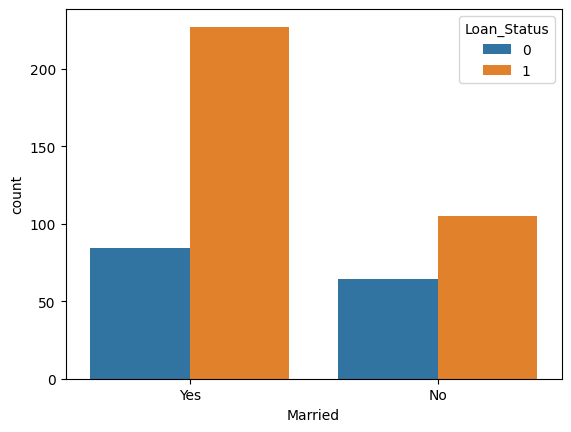

In [28]:
# marital status & Loan Status
sns.countplot(x= 'Married', hue='Loan_Status', data=loan_dataset)

In [32]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [33]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [34]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)  # for row axis = 0 , column =1
Y = loan_dataset['Loan_Status']

In [36]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2  ,stratify=Y,random_state=2) # stratify for proper proportion should come in data

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


Training the model:

Support Vector Machine Model

In [38]:
classifier = svm.SVC(kernel='linear')  # svc we are using because it is classification

In [39]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [40]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)

In [41]:
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7786458333333334


In [42]:
# accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8125


we are printing accuracy score of test and train to check overfitting

Making a predictive system

In [55]:
# 1. Define input data (ensure it matches the feature order of your training X)
input_data = (1, 1, 1, 1, 0, 4583, 1508.0, 128.0, 360.0, 1.0, 0)

# 2. Convert to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# 3. Reshape for a single instance (1 row, many columns)
# This changes the shape from (11,) to (1, 11)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# 4. Predict using the SVC classifier
prediction_SVC = classifier.predict(input_data_reshaped)

# 5. Output the result
print(f"Prediction Value: {prediction_SVC[0]}")

if prediction_SVC[0] == 0:
    print('The loan is NOT approved')
else:
    print('The loan is approved')

Prediction Value: 1
The loan is approved


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [56]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm

# 1. Initialize the Scaler
scaler = StandardScaler()

# 2. Fit the scaler to your training data (X)
# This calculates the mean and std dev for each feature
scaler.fit(X)

# 3. Transform your training data before fitting the classifier
X_train_scaled = scaler.transform(X)

# 4. Train your classifier
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train_scaled, Y)

# --- PREDICTION SECTION ---

# 5. Prepare the input data
input_data = (1, 1, 1, 1, 0, 4583, 1508.0, 128.0, 360.0, 1.0, 0)
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

# 6. SCALE the input data using the same scaler
# IMPORTANT: Use .transform(), NOT .fit_transform() here
std_data = scaler.transform(input_data_as_numpy_array)

# 7. Make the prediction
prediction = classifier.predict(std_data)

if (prediction[0] == 0):
  print('The loan is not approved')
else:
  print('The loan is approved')

The loan is approved


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


First, let's check the distribution of the `Loan_Status` to see if there's a class imbalance, which can often lead to models favoring the majority class.

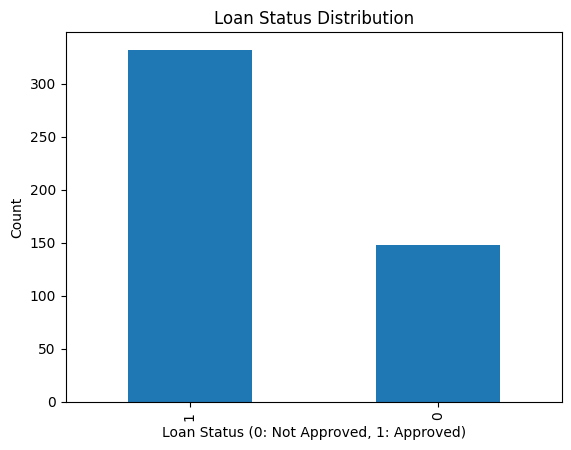

In [60]:
import matplotlib.pyplot as plt

loan_dataset['Loan_Status'].value_counts().plot.bar(title='Loan Status Distribution')
plt.xlabel('Loan Status (0: Not Approved, 1: Approved)')
plt.ylabel('Count')
plt.show()

Next, let's look at the correlation matrix to understand the relationship between `Credit_History` and `Loan_Status`, and how other features correlate with the target variable.

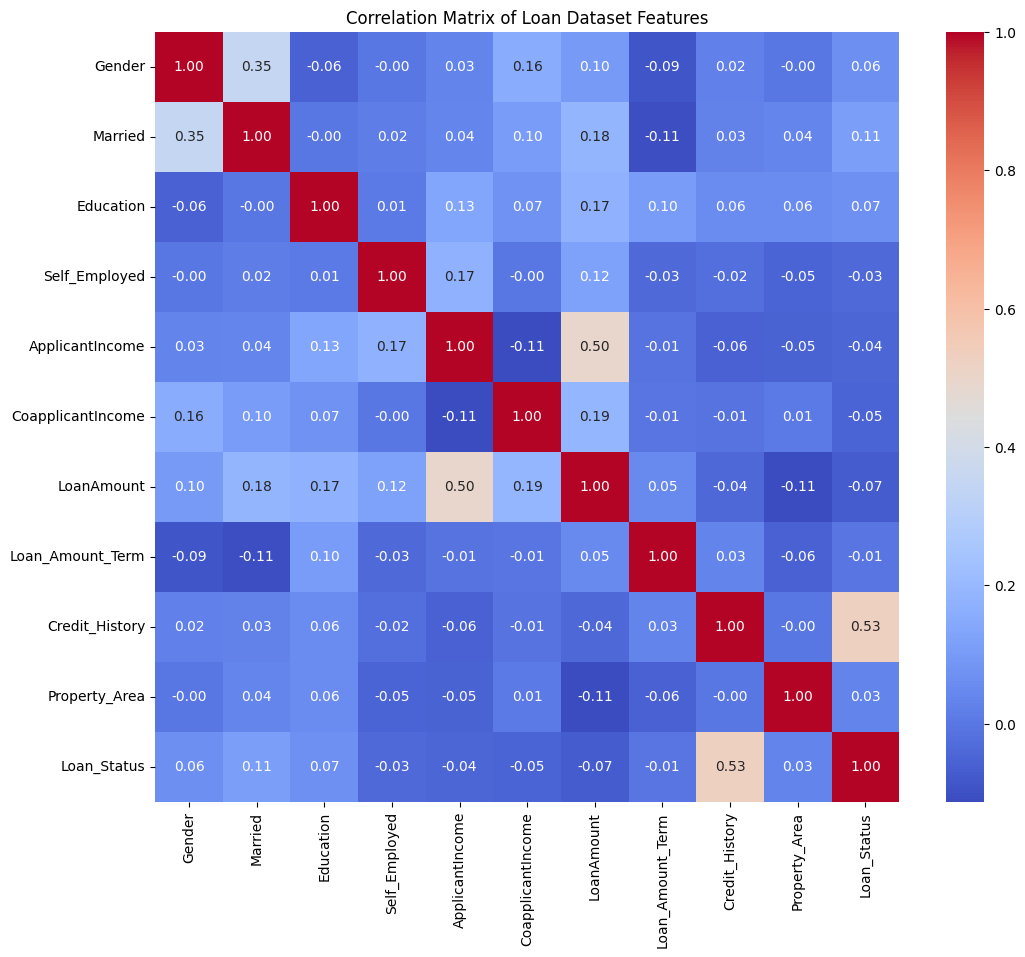

In [61]:
import matplotlib.pyplot as plt

correlation_matrix = loan_dataset.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Loan Dataset Features')
plt.show()

Given the class imbalance observed in the `Loan_Status` distribution, let's apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset. This will help prevent the model from being biased towards the majority class.

In [63]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

print(f'Original dataset shape {X.shape}')
print(f'Resampled dataset shape {X_resampled.shape}')
print(f'Original Loan_Status distribution: {Y.value_counts()}')
print(f'Resampled Loan_Status distribution: {Y_resampled.value_counts()}')

Original dataset shape (480, 11)
Resampled dataset shape (664, 11)
Original Loan_Status distribution: Loan_Status
1    332
0    148
Name: count, dtype: int64
Resampled Loan_Status distribution: Loan_Status
0    332
1    332
Name: count, dtype: int64


Now that the dataset is balanced, let's re-split the data into training and testing sets, and then retrain the SVM model with the resampled data to see if it improves the predictions.

In [64]:
# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, Y_train_resampled, Y_test_resampled = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, stratify=Y_resampled, random_state=2
)

# Initialize and train the SVM classifier with the resampled data
classifier_resampled = svm.SVC(kernel='linear')
classifier_resampled.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the training and test sets
Y_train_pred_resampled = classifier_resampled.predict(X_train_resampled)
Y_test_pred_resampled = classifier_resampled.predict(X_test_resampled)

# Calculate and print accuracy scores
training_data_accuracy_resampled = accuracy_score(Y_train_pred_resampled, Y_train_resampled)
test_data_accuracy_resampled = accuracy_score(Y_test_pred_resampled, Y_test_resampled)

print(f'Accuracy on resampled training data: {training_data_accuracy_resampled}')
print(f'Accuracy on resampled test data: {test_data_accuracy_resampled}')

Accuracy on resampled training data: 0.7457627118644068
Accuracy on resampled test data: 0.7293233082706767


Let's re-evaluate the prediction for the input with `Credit_History = 0` using the new model trained on the resampled data to see if the outcome has changed.

In [66]:
# 1. Prepare the input data (using the problematic input from before)
input_data_test_resampled = (1, 1, 1, 1, 0, 4583, 1508.0, 128.0, 360.0, 1.0, 0)
input_data_as_numpy_array_resampled = np.asarray(input_data_test_resampled).reshape(1, -1)

# 2. IMPORTANT: SCALE the input data using the *same scaler* fitted on the original X
# If you scaled X_resampled, you should refit the scaler on X_resampled, but here we used original X for scaler
# For consistency, we will use the 'scaler' which was fitted on 'X' (the original data before SMOTE),
# as the current model uses X_resampled for training (which was derived from X).
# If we had scaled X_resampled before training classifier_resampled, then we would need to refit scaler on X_resampled

# Assuming the original `scaler` was fitted on `X`:
std_data_resampled = scaler.transform(input_data_as_numpy_array_resampled)

# 3. Make the prediction using the resampled classifier
prediction_resampled = classifier_resampled.predict(std_data_resampled)

print(f"Prediction Value from Resampled Model: {prediction_resampled[0]}")

if (prediction_resampled[0] == 0):
  print('The loan is NOT approved (Resampled Model)')
else:
  print('The loan is approved (Resampled Model)')

Prediction Value from Resampled Model: 0
The loan is NOT approved (Resampled Model)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


If the prediction still indicates approval, or if the accuracy remains lower than desired, we might consider:

*   **Different SVM Kernels**: Try `kernel='rbf'` (Radial Basis Function) instead of `'linear'` for the SVM. RBF kernels can model non-linear relationships, which might be more suitable for the data, especially after SMOTE.
*   **Other Classification Models**: Explore other classification algorithms like Logistic Regression, Random Forest, or Gradient Boosting, which might perform better on this dataset.
*   **Hyperparameter Tuning**: Optimize the hyperparameters of the SVM (e.g., `C` and `gamma` for RBF kernel) using techniques like GridSearchCV.
*   **Evaluation Metrics**: Look beyond just accuracy, especially for imbalanced datasets. Metrics like Precision, Recall, F1-Score, and ROC AUC can provide a more nuanced understanding of the model's performance on both classes.